# Atividade 7

Planejamento de Sistemas Elétricos - PPEE

Aluno: Alexandre Soares Altgott

Matrícula: 102100645



In [21]:
# from google.colab import drive, files
import os

#Montar o Google Drive no Colab com o nome gdrive

Caminho_do_Arquivo = 'Dados_Newave_jul_2023/'

# O comando abaixo mostra qual diretório você está trabalhando momento.
# print( os.getcwd() )


# O comando mostra o que está presente dentro da minha pasta GIF no meu drive, que está dentro do meu drive e em Doutorado. Mudar para o diretório que vocês criaram.
print( os.listdir(Caminho_do_Arquivo) )

['ADTERM.DAT', 'AGRINT.DAT', 'ARQUIVOS.DAT', 'BID.DAT', 'CASO.DAT', 'CDEFVAR.DAT', 'CLAST.DAT', 'CONFHD.DAT', 'CONFT.DAT', 'CURVA.DAT', 'CVAR.DAT', 'C_ADIC.DAT', 'DGER.DAT', 'DSVAGUA.DAT', 'ELNINO.DAT', 'ENSOAUX.DAT', 'EXPH.DAT', 'EXPT.DAT', 'FORMAT.TMP', 'GHMIN.DAT', 'GTMINPAT.DAT', 'GTMIN_CCEE_072023.xlsx', 'HIDR.DAT', 'ITAIPU.DAT', 'LOSS.DAT', 'MANUTT.DAT', 'MENSAG.TMP', 'MODIF.DAT', 'NewaveMsgPortug.txt', 'PATAMAR.DAT', 'PENALID.DAT', 'POSTOS.DAT', 'RE.DAT', 'REE.DAT', 'selcor.dat', 'SHIST.DAT', 'SISTEMA.DAT', 'tecno.dat', 'TERM.DAT', 'VAZOES.DAT', 'VAZPAST.DAT']


In [22]:
from PySDDP.Pen import Newave

PMOSET2023 = Newave(Caminho_do_Arquivo)

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do ARQUIVOS.DAT realizada com sucesso.
OK! Leitura do DGER.DAT realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do MODIF.DAT realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do EXPH.DAT realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do CONFHD.DAT realizada com sucesso.
OK! Leitura do REE.DAT realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do SISTEMA.DAT realizada com sucesso.


## Cálculo do Reservado Equivalente

In [23]:
def CalculaTrecho(Usina,ano,mes):
    """"
    Função que calcula o trecho inteiro de um rio
    """

    EA_max = 0
    EA_atual = 0
    ENA = 0
    E_fio = 0
    ro_fio = 0


    # Salva o ro da primeira usina
    ro = Usina['ro_equiv'][0][0]
    if Usina['vol_max'] == Usina['vol_min']:
        ro_fio += Usina['ro_65'][0][0]

    # Verifica se há usina a jusante
    if Usina['jusante'] != 0:

        # Salva a usina a jusante e salva o seu ro
        Usina2 = PMOSET2023.confhd.get(Usina['jusante'])

        ro += Usina2['ro_equiv'][0][0] 
        if Usina2['vol_max'] == Usina2['vol_min']:
            ro_fio += Usina2['ro_65'][0][0]

        # Continua verificando se há usina a jusante e salvando o ro
        while Usina2['jusante'] != 0:
            Usina2 = PMOSET2023.confhd.get(Usina2['jusante'])
            ro += Usina2['ro_equiv'][0][0] 
            if Usina2['vol_max'] == Usina2['vol_min']:
                ro_fio += Usina2['ro_65'][0][0]

        # Calcula a energia armazenada máxima e atual, a energia natural afluente e a energia fio d'agua da primeira usina
        EA_max += (Usina['vol_max'] - Usina['vol_min'])*ro/2.63
        EA_atual += (Usina['vol_max'] - Usina['vol_min'])*(Usina['vol_ini']/100)*ro/2.63
        ENA += Usina['vazoes'][ano][mes]*Usina['ro_65'][0][0] 
        if Usina['vol_max'] == Usina['vol_min']:
            E_fio = Usina['vazoes'][ano][mes]*ro_fio

        vazao_ant = Usina['vazoes'][ano][mes]

        # Calcula a energia armazenada máxima e atual, a energia natural afluente e a energia fio d'agua das usinas a jusante
        while Usina['jusante'] != 0:
            
            Usina = PMOSET2023.confhd.get(Usina['jusante'])

            vazao_atual = Usina['vazoes'][ano][mes]

            vazao_inc = vazao_atual - vazao_ant

            ro = 0
            ro_fio = 0

            ro += Usina['ro_equiv'][0][0] 
            if Usina['vol_max'] == Usina['vol_min']:
                ro_fio += Usina['ro_65'][0][0]

            if Usina['jusante'] != 0:

                Usina2 = PMOSET2023.confhd.get(Usina['jusante'])

                ro += Usina2['ro_equiv'][0][0] 
                if Usina2['vol_max'] == Usina2['vol_min']:
                    ro_fio += Usina2['ro_65'][0][0]


                while Usina2['jusante'] != 0:
                    Usina2 = PMOSET2023.confhd.get(Usina2['jusante'])
                    ro += Usina2['ro_equiv'][0][0] 
                    if Usina2['vol_max'] == Usina2['vol_min']:
                        ro_fio += Usina2['ro_65'][0][0]

            


            EA_max += (Usina['vol_max'] - Usina['vol_min'])*ro/2.63
            EA_atual += (Usina['vol_max'] - Usina['vol_min'])*(Usina['vol_ini']/100)*ro/2.63

            ENA += Usina['vazoes'][ano][mes]*Usina['ro_65'][0][0] 
            if Usina['vol_max'] == Usina['vol_min']:
                E_fio += vazao_inc*ro_fio
                

            vazao_ant = vazao_atual

    # Caso não haja usina a jusante
    else:

        EA_max += (Usina['vol_max'] - Usina['vol_min'])*ro/2.63
        EA_atual += (Usina['vol_max'] - Usina['vol_min'])*(Usina['vol_ini']/100)*ro/2.63
        ENA += Usina['vazoes'][ano][mes]*Usina['ro_65'][0][0] 
        if Usina['vol_max'] == Usina['vol_min']:
            E_fio = Usina['vazoes'][ano][mes]*ro_fio

    return EA_max,EA_atual,ENA,E_fio

In [24]:
def ReservatorioEquivalente(RevEqui,ano,mes):
    """"
    Função que calcula o reservatório equivalente
    """

    EA_max = 0
    EA_atual = 0
    ENA = 0
    E_fio = 0
    ro_fio = 0

    # Primeiras usinas de cada reservatório equivalente
    if RevEqui == 2:
        origem = [86, 88, 93, 97, 101, 110, 115, 215]
    elif RevEqui == 4:
        origem = [291]
    elif RevEqui == 7:
        origem = [227, 309]
    elif RevEqui == 8:
        origem = [272, 288, 314]
    elif RevEqui == 9:
        origem = [277, 286, 204]
    
    # Calcula o reservatório equivalente calculando cada trecho
    for i in origem:
        Usina = PMOSET2023.confhd.get(i)
        EA_max2, EA_atual2, ENA2, E_fio2 = CalculaTrecho(Usina,ano,mes)
        EA_max += EA_max2
        EA_atual += EA_atual2
        ENA += ENA2
        E_fio += E_fio2

    return EA_max,EA_atual,ENA,E_fio

## Problema de Despacho

Resolução do problema de despacho considerando reservatórios equivalentes.

Será considerado o problema de despacho resolvido por um PL Único.

In [25]:
# Revervatorio Equivalente Utilizado
REE = 9

# Ano e Mês da Análise
ano = -3
mes = 0

# Número de Estágios
nr_est = 8

# Chama a função de formação dos reservatorios equivalentes
EA_max, EA_atual, ENA, E_fio = ReservatorioEquivalente(REE,ano,mes)

EC = ENA - E_fio

In [26]:
# Dados PYSDDP

REEPYSDDP = PMOSET2023.ree.get(REE)

E_fio_PYSDDP = REEPYSDDP['efio_bruta'][-1][mes][ano]
EA_max_PYSDDP = REEPYSDDP['earmax'][0][0]
ENA_PYSDDP = REEPYSDDP['ena_bruta'][-1][mes][ano]
EC_PYSDDP = REEPYSDDP['ec'][-1][mes][ano]
EA_atual_PYSDDP = '-'

In [27]:
import pandas as pd



# Cria um dataframe com os dados de EA_max, EA_atual, ENA, E_fio e EC
tabela = pd.DataFrame({'EA_max':[EA_max,EA_max_PYSDDP],'EA_atual':[EA_atual,EA_atual_PYSDDP],'ENA':[ENA,ENA_PYSDDP],'E_fio':[E_fio,E_fio_PYSDDP],'EC':[EC,EC_PYSDDP]},index=['Calculado','PYSDDP'])



print(tabela)

               EA_max   EA_atual         ENA       E_fio          EC
Calculado  785.951260  751.29081  690.784132  527.719132  163.065000
PYSDDP     785.951233          -  690.784119  527.719116  163.065002


In [28]:
# Revervatorio Equivalente Utilizado
REE = 8

# Ano e Mês da Análise
ano = -3
mes = 0

# Número de Estágios
nr_est = 8

# Chama a função de formação dos reservatorios equivalentes
EA_max, EA_atual, ENA, E_fio = ReservatorioEquivalente(REE,ano,mes)

EC = ENA - E_fio

In [29]:
# Dados PYSDDP

REEPYSDDP = PMOSET2023.ree.get(REE)

E_fio_PYSDDP = REEPYSDDP['efio_bruta'][-1][mes][ano]
EA_max_PYSDDP = REEPYSDDP['earmax'][0][0]
ENA_PYSDDP = REEPYSDDP['ena_bruta'][-1][mes][ano]
EC_PYSDDP = REEPYSDDP['ec'][-1][mes][ano]
EA_atual_PYSDDP = '-'

In [30]:

# Cria um dataframe com os dados de EA_max, EA_atual, ENA, E_fio e EC
tabela = pd.DataFrame({'EA_max':[EA_max,EA_max_PYSDDP],'EA_atual':[EA_atual,EA_atual_PYSDDP],'ENA':[ENA,ENA_PYSDDP],'E_fio':[E_fio,E_fio_PYSDDP],'EC':[EC,EC_PYSDDP]},index=['Calculado','PYSDDP'])



print(tabela)

              EA_max   EA_atual          ENA        E_fio         EC
Calculado  28.106717  27.752572  3504.467291  3467.370602  37.096689
PYSDDP     28.106716          -  3504.467285  3467.370605  37.096687


In [31]:
# Revervatorio Equivalente Utilizado
REE = 4

# Chama a função de formação dos reservatorios equivalentes
EA_max, EA_atual, ENA, E_fio = ReservatorioEquivalente(REE,ano,mes)

In [32]:


lista_uhe = []



usina = {
    "Nome": "GT_1",     # Nome da Usina Térmica 1
    "Capac": 1500.,       # Capacidade Máxima de Geração MWMed
    "Custo": 10.        # Custo de Operação $/MWMed
}

lista_ute = []

lista_ute.append(usina)

usina = {
    "Nome": "GT_2",     # Nome da Usina Térmica 2
    "Capac": 1000.,       # Capacidade Máxima de Geração MWmed
    "Custo": 25.        # Custo de Operação $/MWMed
}

lista_ute.append(usina)




# Pot_max = sum([1.087,8.370,,])

REE1 = {
    "Nome": str(REE), # Nome do REE
    "Pmax": EA_max,             # Potência máxima nominal
    "EAmax": EA_max,              # Energia armazenada máxima
    "EAI": EA_atual               # Energia armazenada inicial
}

d_gerais = {
    "CDef": 500.,             # Custo de Déficit $/MWMed
    "Carga": [ 12000., 12000., 12000.,12000., 12000., 12000.,12000., 12000., 12000.,12000., 12000., 12000.], # Lista com carga a ser atendida por estágio
    "Nr_Disc": 12,            # Número de Discretizações
    "Nr_Est": nr_est-1,              # Número de Estágios
    "Nr_Cen": 2 ,              # Número de Cenários de Afluências
}

REE1['EFIO'] = []
REE1['ENA'] = []

# Retorna a energia fio d'agua e a energia natural afluente para cada mês
for i in range(mes,d_gerais['Nr_Est']+mes):
    REE1['EFIO'].append(ReservatorioEquivalente(REE,ano,mes+i)[3])
    REE1['ENA'].append(ReservatorioEquivalente(REE,ano,mes+i)[2])

lista_uhe.append(REE1)


sistema = {
    "DGer": d_gerais,
    "UHE": lista_uhe,
    "UTE": lista_ute
}
print(REE1)

{'Nome': '4', 'Pmax': 14380.893549978486, 'EAmax': 14380.893549978486, 'EAI': 14057.754627589591, 'EFIO': [375.8318219248564, 688.7788134546498, 1179.6181272094034, 618.7192037527675, 421.2017498944489, 221.99611266981975, 161.64355732422237], 'ENA': [4350.386804679025, 9123.380707143817, 15991.424863996868, 10951.964729705516, 6544.066213856947, 2724.961068910399, 1660.8948204597193]}


# Modelo de Otimização

## Criação de uma Função para o Despacho Hidrotérmico

**Função Objetivo (FOB)**

$		Min \sum_{i=1}^{Nr\_EST} \left( \left( \sum_{j=1}^{Nr\_UTE}  CO_j \cdot gt_{i,j}\right) + CDEF \cdot def_{i} + \left( \sum_{j=1}^{Nr\_REE}  0.01 \cdot ev_{i,j}\right) \right) $

**sujeito a:**

**Balanço Hídrico (uma restrição para cada estágio $i$ e UHE $j$)**

Caso $ i == 1 $:

$ ea_{f_{1,j}} = EAI_j + ENA_{1,j} - e_{t_{1,j}} - e_{v_{1,j}} $

Caso $ i \ge 2 $:

$ ea_{f_{i,j}} = ea_{f_{i-1,j}} + ENA_{i,j} - e_{t_{i,j}} - e_{v_{i,j}} $

**Atendimento à Demanda (uma restrição para cada estágio $i$)**

$  \rho_j \cdot e_{t_{i,j}}  +
				\sum_{j}^{Num\_UTE}	\left( g_{t_{i,j}} \right) + def_i = CARGA_i $

**Restrições de Canalização:**

Para cada estágio $i$ e REE $j$:

$EAMIN_j \ge e_{f_{i,j}} \ge EAMAX_j $

$0 \ge e_{t_{i,j}} \ge ENGOL_j$

$0 \ge e_{v_{i,j}} \ge \infty $

Para cada estágio $i$ e UTE $j$:

$0 \ge g_{t_{i,j}} \ge GTMAX_j $

Para cada estágio $i$:

$ 0 \ge def_i \ge \infty $


In [33]:
from cvxopt.modeling import variable, solvers
from cvxopt.modeling import op

def pl_unico(sistema, cenario, imprime):

  #
  # Cria função de despacho hidrotérmico
  #

  Num_UHE = len(sistema["UHE"])

  Num_UTE = len(sistema["UTE"])



  eaf = []
  ghidr = []
  ev = []
  for i,iusi in enumerate(sistema["UHE"]):
    eaf.append(variable(sistema["DGer"]["Nr_Est"], "Volume Final na Usina "+iusi["Nome"]))
    ghidr.append(variable(sistema["DGer"]["Nr_Est"], "Volume Turbinado na Usina "+iusi["Nome"]))
    ev.append(variable(sistema["DGer"]["Nr_Est"], "Volume Vertido na Usina "+iusi["Nome"]))
  gt = []
  for i,iusi in enumerate(sistema["UTE"]):
    gt.append(variable(sistema["DGer"]["Nr_Est"], "Geração na Usina Térmica "+iusi["Nome"]))
  deficit = variable(sistema["DGer"]["Nr_Est"], "Déficit de Energia no Sistema")

  #
  # Construção da Função Objetivo
  #

  fob = 0

  for i_est in range(sistema["DGer"]["Nr_Est"]):
    for i, iusi in enumerate(sistema["UTE"]):
      fob += iusi['Custo']*gt[i][i_est]

    fob += sistema["DGer"]["CDef"]*deficit[i_est]

    for i, iusi in enumerate(sistema["UHE"]):
      fob += 0.01*ev[i][i_est]

  #
  # Definição das Restrições
  #

  restricoes = []

  #
  # Balanço Hídrico
  #

  for i, iusi in enumerate(sistema["UHE"]):
    for i_est in range(sistema["DGer"]["Nr_Est"]):
      if i_est == 0:
        restricoes.append( eaf[i][i_est] == float(iusi["EAI"]) + float(iusi["ENA"][i_est]) - float(iusi["EFIO"][i_est]) - ghidr[i][i_est] - ev[i][i_est])
      else:
        restricoes.append( eaf[i][i_est]  ==  eaf[i][i_est-1]  + float(iusi["ENA"][i_est]) - float(iusi["EFIO"][i_est]) - ghidr[i][i_est] - ev[i][i_est])

  #
  # Atendimento à Demanda
  #

  for i_est in range(sistema["DGer"]["Nr_Est"]):
    AD = 0
    for i,iusi in enumerate(sistema["UHE"]):
      AD += ghidr[i][i_est]
    for i,usi in enumerate(sistema["UTE"]):
      AD += gt[i][i_est]
    AD += deficit[i_est]
    AD += float(iusi["EFIO"][i_est])
    restricoes.append( AD == sistema["DGer"]["Carga"][i_est])

  #
  # Restricoes Canalização
  #

  for i_est in range(sistema["DGer"]["Nr_Est"]):
    for i, iusi in enumerate(sistema["UHE"]):
      restricoes.append(eaf[i][i_est] >= 0)
      restricoes.append(eaf[i][i_est] <= float(iusi["EAmax"]))
      restricoes.append(ghidr[i][i_est] >= 0)
      restricoes.append(ghidr[i][i_est] <= float(iusi["Pmax"]) - float(iusi["EFIO"][i_est]))
      restricoes.append(ev[i][i_est] >= 0)
    for i, iusi in enumerate(sistema["UTE"]):
      restricoes.append(gt[i][i_est] >= 0)
      restricoes.append(gt[i][i_est] <= iusi["Capac"])
    restricoes.append(deficit[i_est] >= 0)

  #
  # Cria problema de otimização
  #

  problema = op(fob,restricoes)

  #
  # Chama solver GLPK e resolve o problema de otimização linear
  #

  problema.solve('dense','glpk')


  #
  # Prepara dicionário de dados com resultados
  #

  lista_uhe = []
  for i, iusi in enumerate(sistema["UHE"]):
    pula = i*sistema["DGer"]["Nr_Est"]
    cma = []
    volf = []
    volt = []
    volv = []
    for iest in range(sistema["DGer"]["Nr_Est"]):
      cma.append(restricoes[pula+i_est].multiplier.value[0])
      volf.append(eaf[i][iest].value()[0])
      volt.append(ghidr[i][iest].value()[0])
      volv.append(ev[i][iest].value()[0])
    elemento = {
        "eaf": volf,
        "gerhidr": volt,
        "ev": volv,
        "cma": cma
    }
    lista_uhe.append(elemento)

  lista_ute = []
  for i, iusi in enumerate(sistema["UTE"]):
    gerter = []
    for iest in range(sistema["DGer"]["Nr_Est"]):
      gerter.append(gt[i][iest].value()[0])
    elemento = {
        "gt": gerter,
    }
    lista_ute.append(elemento)

  pula = Num_UHE*sistema["DGer"]["Nr_Est"]
  cmo = []
  for i_est in range(sistema["DGer"]["Nr_Est"]):
    cmo.append(restricoes[pula+i_est].multiplier.value[0])

  Dger = {
      "CustoTotal": fob.value()[0],
      "CMO": cmo
  }

  resultado = {
    "DGer": Dger,
    "UHE": lista_uhe,
    "UTE": lista_ute
  }


  return(resultado)


## Programa Principal

Utiliza a função pl_unico e plota gráficos



{'CustoTotal': 1822241.7188188164, 'CMO': [-24.99999999999999, -24.99999999999999, -25.0, -25.0, -500.0, -500.0, -500.0]}


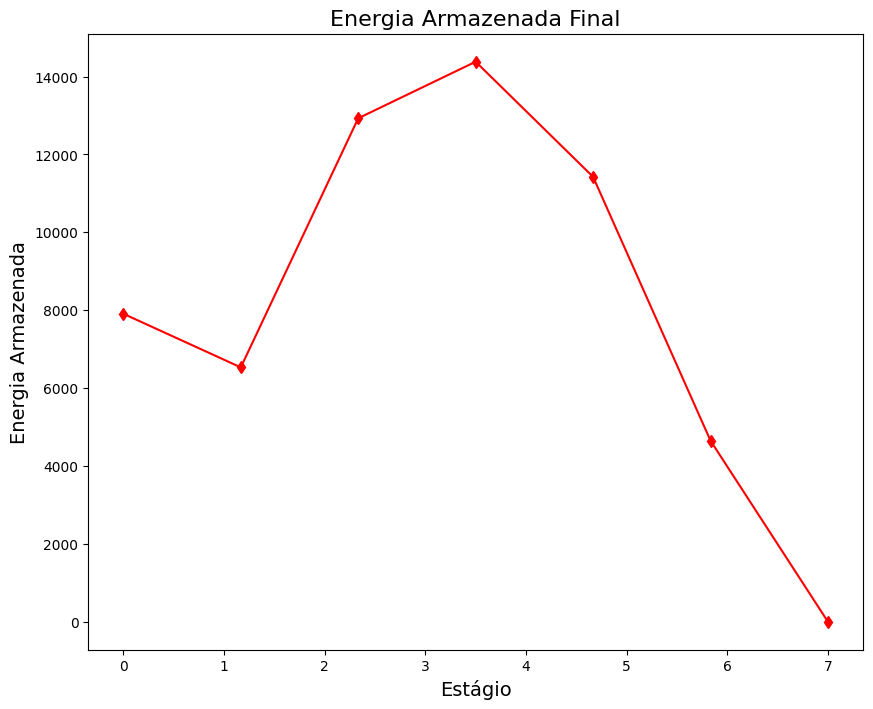

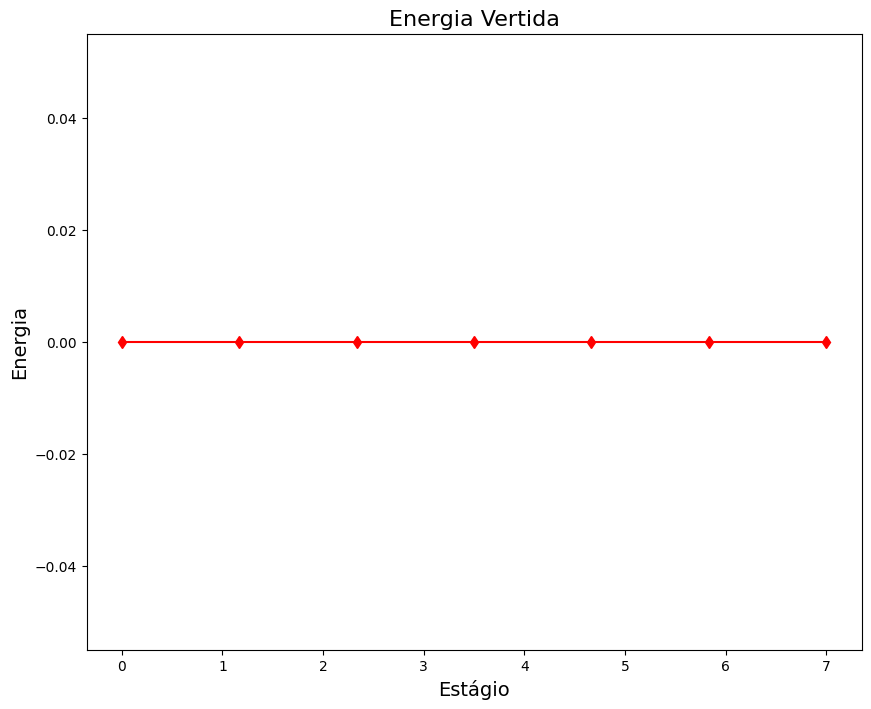

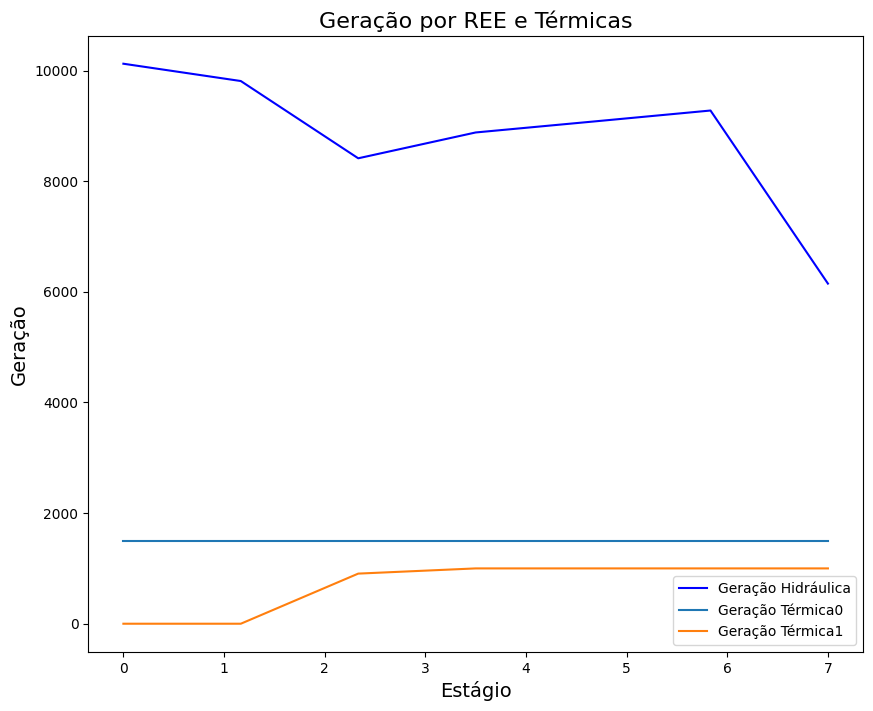

In [34]:
import numpy as np
import matplotlib.pyplot as plt


print(pl_unico(sistema, 0, imprime=False)['DGer'])

resultado = pl_unico(sistema, 0, imprime=False)

x = np.linspace(0, sistema['DGer']['Nr_Est'], sistema['DGer']['Nr_Est'])


plt.figure(figsize=(10,8))
plt.title("Energia Armazenada Final", fontsize=16)
plt.plot( x, resultado['UHE'][0]['eaf'] , marker='d',color='red',label = 'Média')
plt.xlabel('Estágio', fontsize=14)
plt.ylabel('Energia Armazenada', fontsize=14)

plt.figure(figsize=(10,8))
plt.title("Energia Vertida", fontsize=16)
plt.plot( x, resultado['UHE'][0]['ev'] , marker='d',color='red',label = 'Média')
plt.xlabel('Estágio', fontsize=14)
plt.ylabel('Energia', fontsize=14)

plt.figure(figsize=(10,8))
plt.title("Geração por REE e Térmicas", fontsize=16)
plt.plot( x, resultado['UHE'][0]['gerhidr'],color='blue',label = 'Geração Hidráulica')
for i, usi in enumerate(sistema['UTE']):
    plt.plot( x, resultado['UTE'][i]['gt'],label = 'Geração Térmica'+str(i))
plt.xlabel('Estágio', fontsize=14)
plt.ylabel('Geração', fontsize=14)
plt.legend()